# Testing Notebook for Rodent Env

In [7]:

%load_ext autoreload
%autoreload 2

from vnl_mjx.tasks.rodent import base as rodent_base
from vnl_mjx.tasks.rodent import flat_arena
from mujoco_playground._src.locomotion.go1 import base as go1_base
import mujoco as mj
import mediapy as media
import jax
from jax import numpy as jp

import os

xla_flags = os.environ.get("XLA_FLAGS", "")
xla_flags += " --xla_gpu_triton_gemm_any=True"
os.environ["XLA_FLAGS"] = xla_flags
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ["MUJOCO_GL"] = "egl"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
env = flat_arena.FlatWalk()
state = env.reset(jax.random.PRNGKey(0))

In [14]:
state = env.step(state, jp.zeros(env.action_size))

In [24]:
state.data.subtree_linvel

Array([[-1.48129622e-02,  6.72359965e-06, -1.48520544e-01],
       [-1.48129622e-02,  6.72359965e-06, -1.48520544e-01],
       [-1.48129622e-02,  6.72359965e-06, -1.48520544e-01],
       [-1.48129622e-02,  6.72359965e-06, -1.48520544e-01],
       [-1.89209804e-01, -4.78544598e-06, -1.27416149e-01],
       [-1.94756389e-01, -5.59166892e-06, -1.18892334e-01],
       [-2.00578630e-01, -6.30667682e-06, -1.10673435e-01],
       [-2.06624299e-01, -6.77765593e-06, -1.02877289e-01],
       [-2.13085622e-01, -6.94830624e-06, -9.61194113e-02],
       [-2.19153538e-01, -6.76470518e-06, -9.13139880e-02],
       [-2.24424377e-01, -6.20764558e-06, -8.83746892e-02],
       [-2.98162103e-01,  8.45040306e-02, -8.80264193e-02],
       [-3.67262125e-01,  1.94324017e-01, -2.97485203e-01],
       [-6.64498627e-01,  2.55206287e-01, -1.11729908e+00],
       [-1.00717402e+00,  1.77542940e-01, -2.18884254e+00],
       [-2.98306137e-01, -8.41298997e-02, -8.75177905e-02],
       [-3.67792606e-01, -1.93066344e-01

In [26]:
from mujoco_playground._src import reward

In [33]:
vel = jp.linalg.norm(
    state.data.bind(env.mjx_model, env._spec.body("torso-rodent")).subtree_linvel
)

reward.tolerance(2, (2, 2), margin=2, sigmoid="linear", value_at_margin=0.0)

Array(1., dtype=float32, weak_type=True)

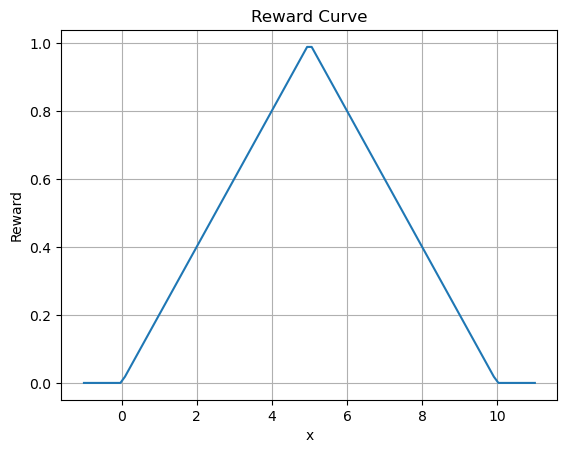

: 

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

x_values = np.linspace(-1, 11, 100)
reward_values = [
    reward.tolerance(x, (5, 5), margin=5, sigmoid="linear", value_at_margin=0.0)
    for x in x_values
]

plt.plot(x_values, reward_values)
plt.xlabel("x")
plt.ylabel("Reward")
plt.title("Reward Curve")
plt.grid()
plt.show()

In [13]:
state.data.bind(env.mjx_model, env._spec.body("torso-rodent")).subtree_linvel

Array([0., 0., 0.], dtype=float32)

In [21]:
def render(model, data=None, height=300, camera=-1):
    if data is None:
        data = mj.MjData(model)
    with mj.Renderer(model, 480, 640) as renderer:
        mj.mj_forward(model, data)
        renderer.update_scene(data, camera=camera)
        media.show_image(renderer.render(), height=height)

""

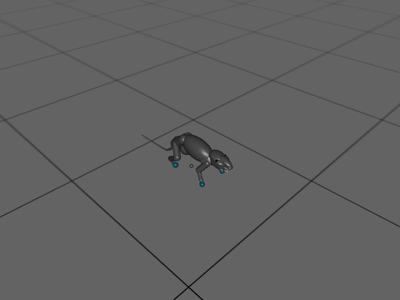

In [24]:
render(env.mj_model, camera="close_profile-rodent")